# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### 2. Lee una imagen
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [2]:
image = plt.imread('data/ejer_kmeans.png')
image.shape

(764, 1499, 3)

In [3]:
image.size/3

1145236.0

In [4]:
764*1499

1145236

In [5]:
image

array([[[0.5686275 , 0.5803922 , 0.61960787],
        [0.5529412 , 0.5647059 , 0.6039216 ],
        [0.54901963, 0.5686275 , 0.6039216 ],
        ...,
        [0.7529412 , 0.7882353 , 0.827451  ],
        [0.74509805, 0.78039217, 0.8235294 ],
        [0.1254902 , 0.12941177, 0.14117648]],

       [[0.5647059 , 0.5764706 , 0.6156863 ],
        [0.54901963, 0.5647059 , 0.6       ],
        [0.54901963, 0.5686275 , 0.6039216 ],
        ...,
        [0.7529412 , 0.7882353 , 0.83137256],
        [0.7490196 , 0.78431374, 0.8235294 ],
        [0.1254902 , 0.12941177, 0.14117648]],

       [[0.5647059 , 0.5764706 , 0.6156863 ],
        [0.54901963, 0.5647059 , 0.6       ],
        [0.54901963, 0.5686275 , 0.6039216 ],
        ...,
        [0.7529412 , 0.7921569 , 0.8352941 ],
        [0.7529412 , 0.7921569 , 0.83137256],
        [0.1254902 , 0.12941177, 0.14117648]],

       ...,

       [[0.26666668, 0.28627452, 0.29411766],
        [0.26666668, 0.28627452, 0.29803923],
        [0.26666668, 0

Muestra la imagen para ver que se ha cargado bien

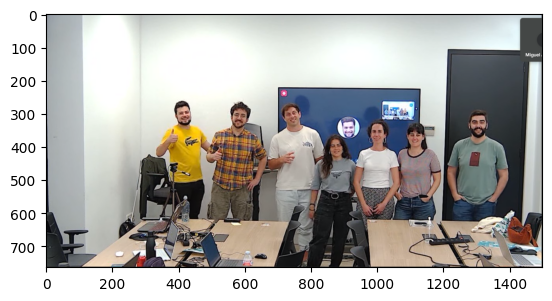

In [6]:
plt.imshow(image)

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [7]:
X = image.reshape(-1,3)
X.shape

(1145236, 3)

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [8]:
k = 10
kmeans = KMeans(n_clusters=k, n_init=10, random_state=10).fit(X)

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizlos para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [9]:
kmeans.labels_

array([4, 4, 4, ..., 5, 5, 5], dtype=int32)

In [10]:
kmeans.labels_.shape

(1145236,)

In [11]:
kmeans.cluster_centers_

array([[0.4777761 , 0.3361506 , 0.2671661 ],
       [0.7681643 , 0.7734588 , 0.7589624 ],
       [0.2374934 , 0.2371037 , 0.24905547],
       [0.9696236 , 0.98534846, 0.9703973 ],
       [0.54329336, 0.5007779 , 0.47901165],
       [0.09699345, 0.09057415, 0.09825179],
       [0.70818055, 0.6720963 , 0.63227487],
       [0.87350166, 0.89241004, 0.87016773],
       [0.79781175, 0.61385584, 0.10041571],
       [0.27401528, 0.34658098, 0.45376998]], dtype=float32)

In [12]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

In [13]:
kmeans.cluster_centers_[kmeans.labels_]

array([[0.54329336, 0.5007779 , 0.47901165],
       [0.54329336, 0.5007779 , 0.47901165],
       [0.54329336, 0.5007779 , 0.47901165],
       ...,
       [0.09699345, 0.09057415, 0.09825179],
       [0.09699345, 0.09057415, 0.09825179],
       [0.09699345, 0.09057415, 0.09825179]], dtype=float32)

In [14]:
kmeans.cluster_centers_[kmeans.labels_].shape

(1145236, 3)

In [15]:
kmeans.labels_.shape

(1145236,)

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [21]:
image.shape

(764, 1499, 3)

In [16]:
segmented_img = segmented_img.reshape(image.shape)

#### 7. Imprime y guarda en tu ordenador la imagen resultante

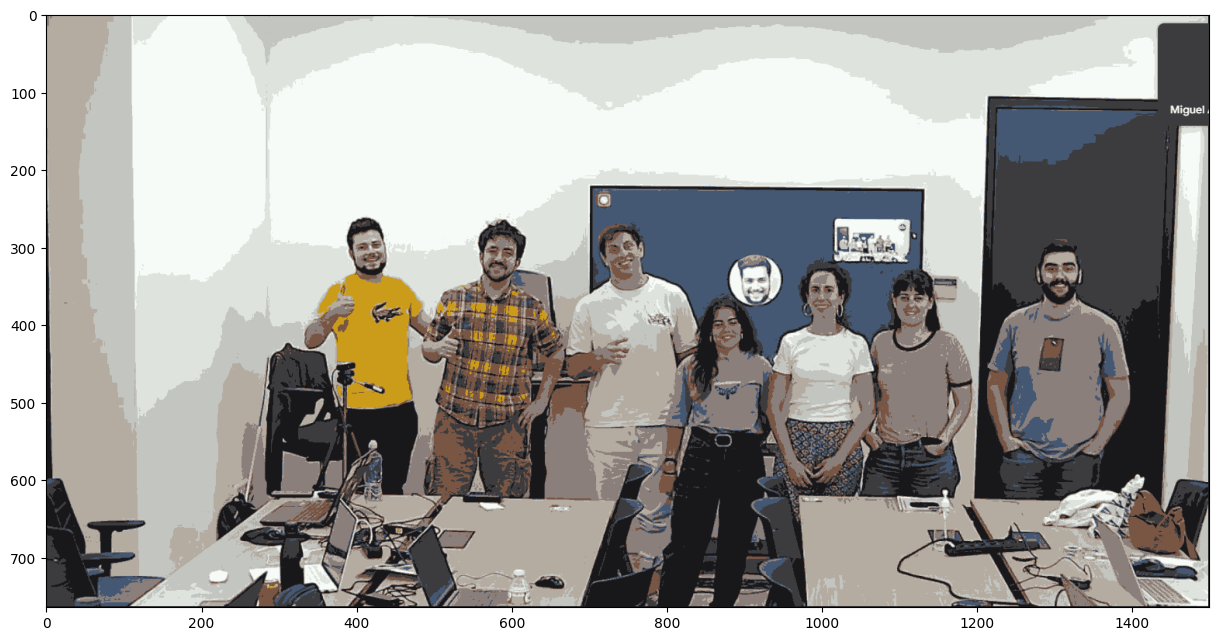

In [17]:
fig = plt.figure(figsize=(15,15))
plt.imshow(segmented_img)

In [18]:
fig.savefig("data/kmeans_1_output.png")

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar o mostrar por pantalla

In [19]:
def cluster_colors(image, n_colores, save=False):
    image = plt.imread(image)
    X = image.reshape(-1,3)
    kmeans = KMeans(n_clusters=n_colores).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    fig = plt.figure(figsize=(15,15))
    plt.imshow(segmented_img.reshape(image.shape))

    if save:
        fig.savefig("mi_imagen.png")

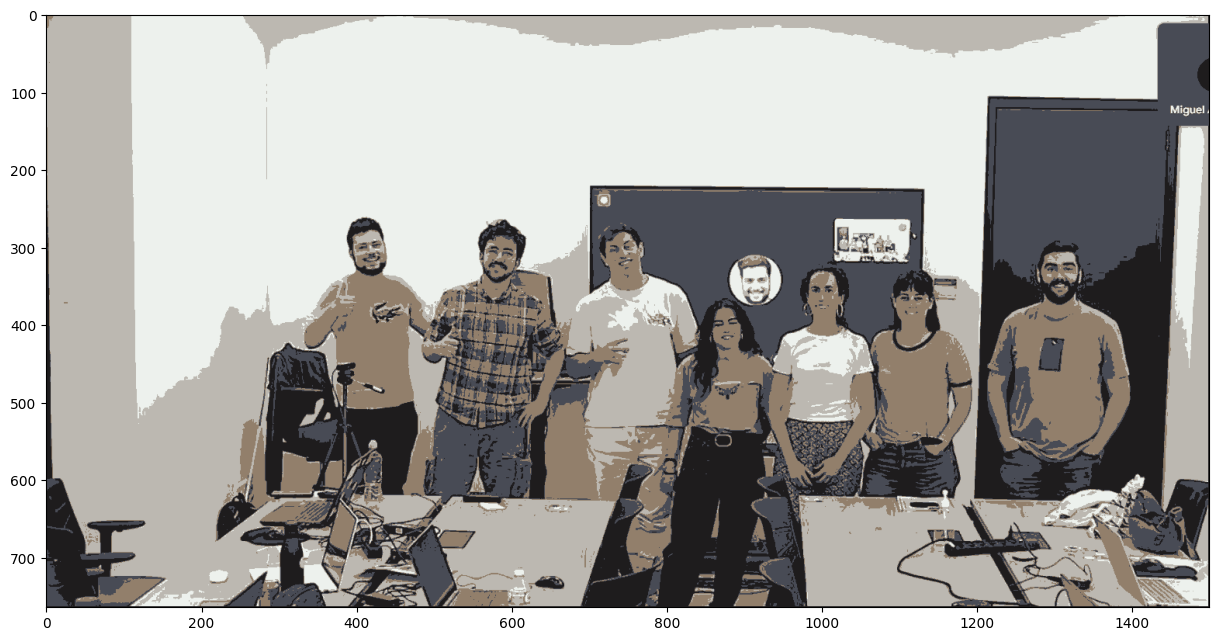

In [23]:
cluster_colors('data/ejer_kmeans.png', 5)